<a href="https://colab.research.google.com/github/Chenxi-yi/AI-Job-Notes/blob/master/CNN_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""### 挂载到google drive上""" 
from google.colab import drive

# 使用工具colab的接口挂载google drive目录，这样可以从外部获取数据并且可以把训练好的模型保存在google drive上
drive.mount('/content/gdrive')
#model.save('/content/gdrive/My Drive/DL/mnist_model.h5')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


1. import packet


In [3]:
#We upload all the packages we need
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import math
import os
import scipy.misc
from scipy.stats import itemfreq
from random import sample
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Image manipulation.
import PIL.Image
from IPython.display import display
#from resizeimage import resizeimage

#Panda
import pandas as pd

#Open a Zip File
from zipfile import ZipFile
from io import BytesIO

#check tensorflow version
tf.__version__

'1.14.0'

2. normalize data
reshape the picture as a square

In [0]:
# This function help to create  a pickle file gathering all the image from a zip folder
###############
def DataBase_creator(archivezip, nwigth, nheight, save_name):
    #We choose the archive (zip file) + the new wigth and height for all the image which will be reshaped
    
    # Start-time used for printing time-usage below.
    start_time = time.time()
    
    s = (len(list_name[:])-1, nwigth, nheight,3) #nwigth x nheight = number of features because images are nwigth x nheight pixels
    allImage = np.zeros(s)

    for i in range(1,len(list_name[:])):
        filename = list_name[i]
        image = PIL.Image.open(filename) # open colour image
        image = image.resize((nwigth, nheight))
        image = np.array(image)
        image = np.clip(image/255.0, 0.0, 1.0) #255 = max of the value of a pixel

        allImage[i-1]=image
    
    #we save the newly created data base
    pickle.dump(allImage, open( save_name + '.p', "wb" ) )
    
    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [6]:
from sklearn.datasets import load_files  
from google.colab import files
import os
import glob
image_resize = 60
archive_train = load_files('/content/gdrive/My Drive/DL/kaggle_dog/dog-breed-identification/train')
archive_test = load_files('/content/gdrive/My Drive/DL/kaggle_dog/dog-breed-identification/test')
os.chdir("/content/gdrive/My Drive/DL/kaggle_dog/dog-breed-identification/train")
list_name = [file_name for file_name in glob.glob("*.jpg")]
len(list_name)

10222

In [7]:
DataBase_creator(archivezip = archive_train, nwigth = image_resize, nheight = image_resize , save_name = "train_new")

Time usage: 0:50:35


In [8]:
DataBase_creator(archivezip = archive_test, nwigth = image_resize, nheight = image_resize , save_name = "test_new")

Time usage: 0:01:17


3.load train and test

In [9]:
#load TRAIN
train = pickle.load( open( "train_new.p", "rb" ) )
train.shape

(10221, 60, 60, 3)

In [10]:
#load TEST
test = pickle.load( open( "test_new.p", "rb" ) )
test.shape

(10221, 60, 60, 3)

4.load df_train df_test

In [12]:
df_train= pd.read_csv('/content/gdrive/My Drive/DL/kaggle_dog/dog-breed-identification/labels.csv')
df_train.sample(5)

,id,breed
4394,6daa0da30db6c20972b50b5fb4742c15,kerry_blue_terrier
8127,cb3121245ba0e86572d9f46f10ca0e5f,rottweiler
1084,1ad9c8713583e136c1c9884a26a8de10,malamute
5233,8406d837b2d7fac1c3cd621abb4c4f9e,west_highland_white_terrier
5726,90668f46101549651824cb05e2224269,irish_wolfhound


In [14]:
image_resize = 60
nwigth = image_resize
nheight = image_resize


# Start-time used for printing time-usage below.
start_time = time.time()

s = (len(df_train['breed']), nwigth, nheight,3) #nwigth x nheight = number of features because images are nwigth x nheight pixels
allImage = np.zeros(s)
i= 0
for f, breed in df_train.values:
    image = PIL.Image.open('/content/gdrive/My Drive/DL/kaggle_dog/dog-breed-identification/train/{}.jpg'.format(f))
    image = image.resize((nwigth, nheight))
    image = np.array(image)
    image = np.clip(image/255.0, 0.0, 1.0) #255 = max of the value of a pixel
    i += 1
    
    allImage[i-1]=image

train = allImage

# Ending time.
end_time = time.time()

# Difference between start and end-times.
time_dif = end_time - start_time
print(time_dif)

94.6167504787445


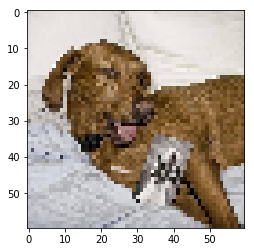

In [15]:
#let's check one image from the train data base
lum_img = train[100,:,:,:]
plt.imshow(lum_img)
plt.show()

In [18]:
labels_raw = pd.read_csv('/content/gdrive/My Drive/DL/kaggle_dog/dog-breed-identification/labels.csv')
df_train.sample(5)

,id,breed
6314,9f6a267ebf271f72f91ca0a97d60a90f,basenji
1980,30dd03d1b558bc072215c379d4af65e4,otterhound
6800,aac6e8cf0ca09868f9906aa70854dce3,sealyham_terrier
9136,e58621674644d3729585675ecf09c091,ibizan_hound
48,013f8fdf6d638c7bb042f5f17e8a9fdc,tibetan_terrier


5. Extract the N most represented breeds

In [19]:
Nber_of_breeds = 8

#######Get the N most represented breeds########
def main_breeds(labels_raw, Nber_breeds , all_breeds='TRUE'):
    labels_freq_pd = itemfreq(labels_raw["breed"])
    labels_freq_pd = labels_freq_pd[labels_freq_pd[:, 1].argsort()[::-1]] #[::-1] ==> to sort in descending order
    
    if all_breeds == 'FALSE':
        main_labels = labels_freq_pd[:,0][0:Nber_breeds]
    else: 
        main_labels = labels_freq_pd[:,0][:]
        
    labels_raw_np = labels_raw["breed"].as_matrix() #transform in numpy
    labels_raw_np = labels_raw_np.reshape(labels_raw_np.shape[0],1)

    labels_filtered_index = np.where(labels_raw_np == main_labels)
    
    return labels_filtered_index

labels_filtered_index = main_breeds(labels_raw = labels_raw, Nber_breeds = Nber_of_breeds, all_breeds='FALSE')
labels_filtered = labels_raw.iloc[labels_filtered_index[0],:]
train_filtered = train[labels_filtered_index[0],:,:,:]

print('- Number of images remaining after selecting the {0} main breeds : {1}'.format(Nber_of_breeds, labels_filtered_index[0].shape))
print('- The shape of train_filtered dataset is : {0}'.format(train_filtered.shape))

- Number of images remaining after selecting the 8 main breeds : (922,)
- The shape of train_filtered dataset is : (922, 60, 60, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


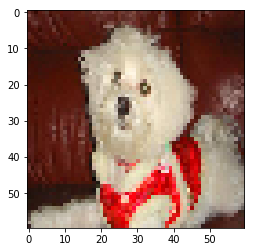

In [20]:
#print(labels_filtered[90])
lum_img = train_filtered[1,:,:,:]
plt.imshow(lum_img)
plt.show()

6. One-hot labels

In [21]:
#We select the labels from the N main breeds
labels = labels_filtered["breed"].as_matrix()
labels = labels.reshape(labels.shape[0],1) #labels.shape[0] looks faster than using len(labels)
labels.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(922, 1)

In [0]:
#Function to breate one-hot labels
def matrix_Bin(labels):
    labels_bin=np.array([])

    labels_name, labels0 = np.unique(labels, return_inverse=True)
    labels0
    
    for _, i in enumerate(itemfreq(labels0)[:,0].astype(int)):
        labels_bin0 = np.where(labels0 == itemfreq(labels0)[:,0][i], 1., 0.)
        labels_bin0 = labels_bin0.reshape(1,labels_bin0.shape[0])

        if (labels_bin.shape[0] == 0):
            labels_bin = labels_bin0
        else:
            labels_bin = np.concatenate((labels_bin,labels_bin0 ),axis=0)

    print("Nber SubVariables {0}".format(itemfreq(labels0)[:,0].shape[0]))
    labels_bin = labels_bin.transpose()
    print("Shape : {0}".format(labels_bin.shape))
    
    return labels_name, labels_bin

In [23]:
labels_name, labels_bin = matrix_Bin(labels = labels)
labels_bin[0:9]

Nber SubVariables 8
Shape : (922, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  app.launch_new_instance()


array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]])

7. Quick checks on Labels

Let's see exactly the N labels we keep. As you will see below from the one-hot labels arry you can find which breed it corresponds.


In [24]:
for breed in range(len(labels_name)):
    print('Breed {0} : {1}'.format(breed,labels_name[breed]))

Breed 0 : afghan_hound
Breed 1 : bernese_mountain_dog
Breed 2 : entlebucher
Breed 3 : great_pyrenees
Breed 4 : maltese_dog
Breed 5 : pomeranian
Breed 6 : scottish_deerhound
Breed 7 : shih-tzu


In [25]:
labels[0:9]

array([['scottish_deerhound'],
       ['maltese_dog'],
       ['shih-tzu'],
       ['scottish_deerhound'],
       ['entlebucher'],
       ['entlebucher'],
       ['maltese_dog'],
       ['bernese_mountain_dog'],
       ['entlebucher']], dtype=object)

Convolutional Neural Network
1. Creation of a Train and Validation DataBase

We split our train data base in two: a train data base and a validation database. Therefore, we can check the accuracy of the model train made from the 'train database', on the validation database.




In [26]:
num_validation = 0.30
X_train, X_validation, y_train, y_validation = train_test_split(train_filtered, labels_bin, test_size=num_validation, random_state=6)
X_train.shape

(645, 60, 60, 3)

Creation of the Train DataBase and Test DataBase

In [0]:
def train_test_creation(x, data, toPred): 
  indices = sample(range(data.shape[0]),int(x * data.shape[0])) 
  indices = np.sort(indices, axis=None) 
  index = np.arange(data.shape[0]) 
  reverse_index = np.delete(index, indices,0)
  train_toUse = data[indices]
  train_toPred = toPred[indices]
  test_toUse = data[reverse_index]
  test_toPred = toPred[reverse_index]
  return train_toUse, train_toPred, test_toUse, test_toPred


In [30]:
df_train_toUse, df_train_toPred, df_test_toUse, df_test_toPred = train_test_creation(0.7, train_filtered, labels_bin) 
df_train_toUse.shape

(645, 60, 60, 3)

In [31]:
#from the one-hot database we can find the breed.
df_validation_toPred_cls = np.argmax(y_validation, axis=1)
df_validation_toPred_cls[0:9]

array([5, 1, 5, 6, 7, 2, 5, 1, 1])

pomeranian
5


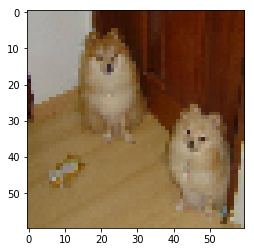

In [32]:
# Quick check of the array created :
i=2
print(labels_name[df_validation_toPred_cls[i]])
print(df_validation_toPred_cls[i])
lum_img = X_validation[i,:,:,:]
plt.imshow(lum_img)
plt.show()


2. CNN with Tensorflow - definition of the layers

The CNN archtecture will be as followed :

Convolutional Layer n°1 with 32 filters
      
  Max pooling
  
  Relu
 
 *********************************

Convolutional Layer n°2 with 64 filters
  
  Max pooling
 
 Relu
 *********************************
Convolutional Layer n°3 with 128 filters
  
  Max pooling
    
  Relu

DropOut
 *********************************
Flatten Layer

 *********************************

Fully Connected Layer with 500 nodes
  
  Relu
  
  DropOut
   *********************************

Fully Connected Layer with n nodes (n = number of breeds)

In [0]:
# Our images are 100 pixels in each dimension.
img_size = image_resize

# Number of colour channels for the images: 3
num_channels = 3

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Image Shape
img_shape = (img_size, img_size, num_channels)

# Number of classes : 5 breeds
num_classes = Nber_of_breeds

In [0]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
#outputs random value from a truncated normal distribution

def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))
#outputs the constant value 0.05

In [0]:
def new_conv_layer(input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True,
                   use_dropout=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)
    
    if use_dropout:
        layer = tf.nn.dropout(layer,keep_prob_conv)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights

In [0]:
def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features



In [0]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True,
                 use_dropout=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)
    
    if use_dropout:
        layer = tf.nn.dropout(layer,keep_prob_fc)
        
    return layer

3. CNN with Tensorflow - set up of placeholder tensor

In [0]:
x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels]) #-1 put everything as 1 array
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, axis=1)
keep_prob_fc=tf.placeholder(tf.float32)
keep_prob_conv=tf.placeholder(tf.float32)

4. CNN with Tensorflow - Design the layer

In this part, you can play with the filter sizes and the number of filters. The best model is ont with the proper number of layers but also a good choice of filter sizes and number of filters.

In [0]:
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 32         # There are 32 of these filters.

# Convolutional Layer 2.
filter_size2 = 4          # Convolution filters are 4 x 4 pixels.
num_filters2 = 64      # There are 64 of these filters.

# Convolutional Layer 3.
filter_size3 = 3          # Convolution filters are 3 x 3 pixels.
num_filters3 = 128      # There are 128 of these filters.

# Fully-connected layer.
fc_size = 500 

In [41]:
layer_conv1, weights_conv1 = \
    new_conv_layer(input=x_image,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True,
                   use_dropout=False)
    
layer_conv2, weights_conv2 = \
    new_conv_layer(input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True,
                   use_dropout=False)
    
layer_conv3, weights_conv3 = \
    new_conv_layer(input=layer_conv2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=True,
                   use_dropout=True)

W0701 10:12:19.788575 140402405070720 deprecation.py:506] From <ipython-input-35-e08643a2cf06>:53: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
layer_flat, num_features = flatten_layer(layer_conv3)

In [43]:
#Train
layer_fc1 = new_fc_layer(input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size,
                         use_relu=True,
                         use_dropout=True)

layer_fc1

layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False,
                         use_dropout=False)

layer_fc2

<tf.Tensor 'add_4:0' shape=(?, 8) dtype=float32>

In [0]:
#Prediction :
y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, axis=1)

5. CNN with Tensorflow - Definition of the cost function (cross-entropy)

In [45]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

W0701 10:13:16.611303 140402405070720 deprecation.py:323] From <ipython-input-45-ef2667b19cd2>:2: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



6. CNN with Tensorflow - Training of the CNN

In [0]:
session = tf.Session()

def init_variables():
    session.run(tf.global_variables_initializer())

In [0]:
batch_size = 50

#function next_batch
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [0]:
def optimize(num_iterations, X):
    global total_iterations
    
    start_time = time.time()
    
    #array to plot
    losses = {'train':[], 'validation':[]}
    
    for i in range(num_iterations):
            total_iterations += 1
            # Get a batch of training examples.
            # x_batch now holds a batch of images and
            # y_true_batch are the true labels for those images.
            x_batch, y_true_batch = next_batch(batch_size, X_train, y_train)

            # Put the batch into a dict with the proper names
            # for placeholder variables in the TensorFlow graph.
            feed_dict_train = {x: x_batch,
                               y_true: y_true_batch,
                               keep_prob_conv : 0.3,
                               keep_prob_fc : 0.4}
            feed_dict_validation = {x: X_validation,
                               y_true: y_validation,
                               keep_prob_conv : 1,
                               keep_prob_fc : 1}
            
            # Run the optimizer using this batch of training data.
            # TensorFlow assigns the variables in feed_dict_train
            # to the placeholder variables and then runs the optimizer.
            session.run(optimizer, feed_dict=feed_dict_train)
            
            acc_train = session.run(accuracy, feed_dict=feed_dict_train)
            acc_validation = session.run(accuracy, feed_dict=feed_dict_validation)
            losses['train'].append(acc_train)
            losses['validation'].append(acc_validation)
            
            # Print status every X iterations.
            if (total_iterations % X == 0) or (i ==(num_iterations -1)):
            # Calculate the accuracy on the training-set.
                                
                msg = "Iteration: {0:>6}, Training Accuracy: {1:>6.1%}, Validation Accuracy: {2:>6.1%}"
                print(msg.format(total_iterations, acc_train, acc_validation))
                
    
    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))
    
    plt.plot(losses['train'], label='Training loss')
    plt.plot(losses['validation'], label='Validation loss')
    plt.legend()
    _ = plt.ylim()

In [0]:
init_variables()
total_iterations = 0

Iteration:    250, Training Accuracy:  32.0%, Validation Accuracy:  33.9%
Iteration:    500, Training Accuracy:  38.0%, Validation Accuracy:  41.5%
Iteration:    750, Training Accuracy:  48.0%, Validation Accuracy:  39.4%
Iteration:   1000, Training Accuracy:  60.0%, Validation Accuracy:  40.8%
Iteration:   1250, Training Accuracy:  80.0%, Validation Accuracy:  41.2%
Iteration:   1500, Training Accuracy:  84.0%, Validation Accuracy:  40.4%
Iteration:   1750, Training Accuracy:  84.0%, Validation Accuracy:  43.3%
Iteration:   2000, Training Accuracy:  90.0%, Validation Accuracy:  43.7%
Iteration:   2250, Training Accuracy:  88.0%, Validation Accuracy:  43.7%
Iteration:   2500, Training Accuracy:  96.0%, Validation Accuracy:  42.2%
Iteration:   2750, Training Accuracy:  94.0%, Validation Accuracy:  43.3%
Iteration:   3000, Training Accuracy:  94.0%, Validation Accuracy:  42.6%
Iteration:   3250, Training Accuracy:  92.0%, Validation Accuracy:  41.5%
Iteration:   3500, Training Accuracy: 

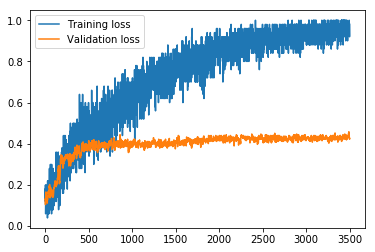

In [50]:
optimize(num_iterations=3500, X=250)

7. CNN with Tensorflow - Results

The results are not so good as the accuracy is only 44%. Using a pre-trained model with Keras will give you a better result but with this model, you will know how to build from scratch your own CNN with tensorflow.

By having more photos of dogs, we can increase the accuracy. in addition, we can create new images in our training dataset by rotating the images. it's what we call image augmentation. It will help the model to detect a patern which can have different 'position' in the space.

Go a 'bit' deeper on the result :

I just share some function to show some images from the new test database with the corresponding breeds and the predicted breeds. I also add the confusion matrix to see the results.

In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 12
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(4, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [0]:
def plot_confusion_matrix(data_pred_cls,data_predicted_cls):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.
  
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=data_pred_cls,
                          y_pred=data_predicted_cls)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

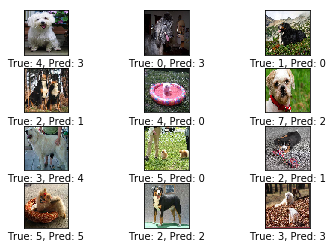

In [53]:
feed_dict_validation = {x: X_validation,
                    y_true: y_validation,
                    keep_prob_conv : 1,
                    keep_prob_fc : 1}
df_validation_Predicted_cls = session.run(y_pred_cls, feed_dict=feed_dict_validation)

plot_images(images=X_validation[50:62],
            cls_true=df_validation_toPred_cls[50:62],
            cls_pred=df_validation_Predicted_cls [50:62])

True : 7 / shih-tzu
Pred : 7 / shih-tzu


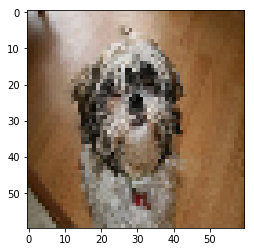

In [54]:
i = 63
print(("True : {0} / {1}").format(df_validation_toPred_cls[i], labels_name[df_validation_toPred_cls[i]]))
print(("Pred : {0} / {1}").format(df_validation_Predicted_cls[i], labels_name[df_validation_Predicted_cls[i]]))

lum = X_validation[i,:,:,:]
plt.imshow(lum)
plt.show()

[[ 7  0  5  4  3  5  6  1]
 [ 1 18 13  1  0  0  3  3]
 [ 0  8 23  0  0  0  4  1]
 [ 1  3  1 10  9  3  4  3]
 [ 2  0  0  8 14  9  0  1]
 [ 4  1  0  3  2 17  1  1]
 [ 6  1  2  3  1  1 18  2]
 [ 2  3  2  7  7  4  4 11]]


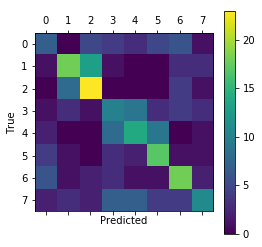

In [55]:
plot_confusion_matrix(df_validation_toPred_cls,df_validation_Predicted_cls)


As you can see, the model has difficulties to differenciate Breed 1 : bernese_mountain_dog and Breed 2 : entlebucher. This 2 breeds are look alike a lot (same color and shape). So, it's look normal that our model have make some mistakes between this two breeds.

What the weights look like

In [0]:
def plot_conv_layer(layer, image):
    feed_dict = {x: [image],
                keep_prob_conv : 1,
                keep_prob_fc : 1}

    values = session.run(layer, feed_dict=feed_dict)

    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

In [0]:
def plot_conv_weights(weights, input_channel):

    w = session.run(weights)

    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()



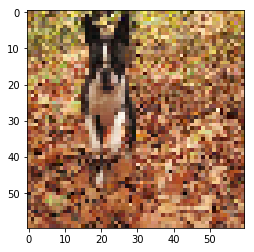

In [59]:
image1 = train[0,:,:,:]
plt.imshow(image1)
plt.show()

Layer 1

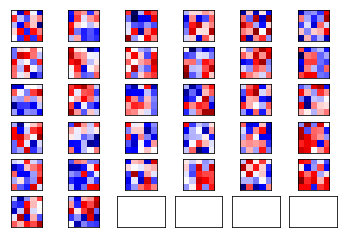

In [60]:
plot_conv_weights(weights=weights_conv1, input_channel = 0)

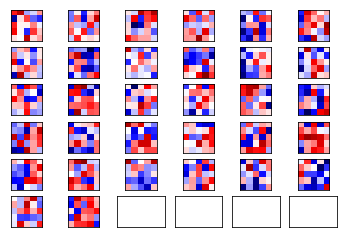

In [61]:
plot_conv_weights(weights=weights_conv1, input_channel = 1)

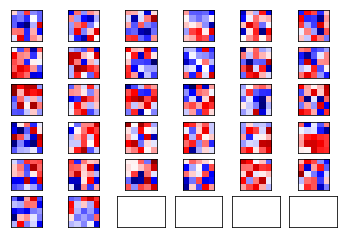

In [62]:
plot_conv_weights(weights=weights_conv1, input_channel = 2)

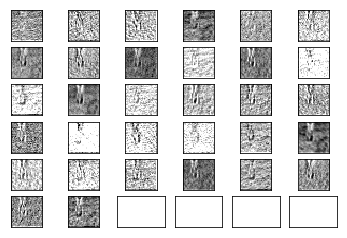

In [63]:
plot_conv_layer(layer=layer_conv1, image=image1)

Layer 2


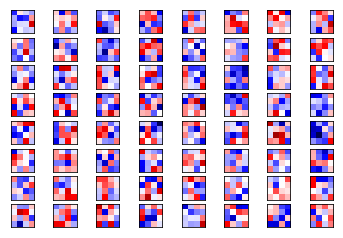

In [64]:
plot_conv_weights(weights=weights_conv2, input_channel = 0)

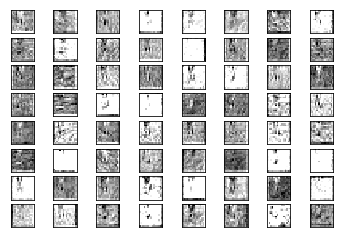

In [65]:
plot_conv_layer(layer=layer_conv2, image=image1)

Layer 3

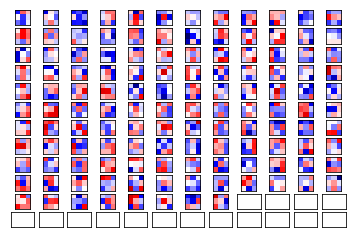

In [66]:
plot_conv_weights(weights=weights_conv3, input_channel = 1)

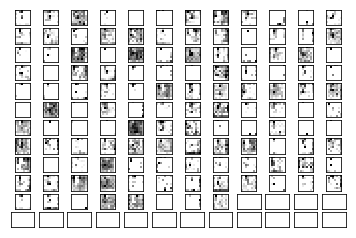

In [67]:
plot_conv_layer(layer=layer_conv3, image=image1)